In [1]:
import numpy as np
import pandas as pd

#file_path = 'C:/Users/MOHAMED ANAS/Downloads/auto+mpg/auto-mpg.data-original'
file_path = 'C:/Users/MOHAMED ANAS/Downloads/auto+mpg/auto-mpg.data'

columnnames = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 
    'model_year', 'origin', 'car_name']

df = pd.read_csv(file_path, delim_whitespace=True, names=columnnames)

print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0        70.0     1.0  chevrolet chevelle malibu  
1        70.0     1.0          buick skylark 320  
2        70.0     1.0         plymouth satellite  
3        70.0     1.0              amc rebel sst  
4        70.0     1.0                ford torino  


In [2]:
dataRows=len(df.index)
print(dataRows)

406


In [3]:
dataCols=len(df.columns)
print(dataCols)

9


In [4]:
rawData=df

In [5]:
rawData.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
396,26.0,4.0,156.0,92.0,2585.0,14.5,82.0,1.0,chrysler lebaron medallion
397,22.0,6.0,232.0,112.0,2835.0,14.7,82.0,1.0,ford granada l
398,32.0,4.0,144.0,96.0,2665.0,13.9,82.0,3.0,toyota celica gt
399,36.0,4.0,135.0,84.0,2370.0,13.0,82.0,1.0,dodge charger 2.2
400,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,1.0,chevrolet camaro
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger
405,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,1.0,chevy s-10


In [6]:
# Checking for missing values 
missing_val = df.isnull().sum()
print("Missing values in each column:")
print(missing_val)

Missing values in each column:
mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [7]:
preprocessedData=df

In [8]:
# Filling na values
preprocessedData['horsepower'].fillna(preprocessedData['horsepower'].mean(), inplace=True)
preprocessedData['mpg'].fillna(preprocessedData['mpg'].mean(), inplace=True)
print(preprocessedData.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0        70.0     1.0  chevrolet chevelle malibu  
1        70.0     1.0          buick skylark 320  
2        70.0     1.0         plymouth satellite  
3        70.0     1.0              amc rebel sst  
4        70.0     1.0                ford torino  


In [9]:
# 1. Average MPG
averageMPG = preprocessedData['mpg'].mean()
print("The average miles per gallon (MPG) is ",averageMPG)

The average miles per gallon (MPG) is  23.51457286432162


In [10]:
# 2. Most Common Vehicle Type
commonVehicleType = preprocessedData['car_name'].mode()[0]
print("The most common vehicle type is ",commonVehicleType)

The most common vehicle type is  ford pinto


In [11]:
# 3. Most Frequently Occurring Cylinder Count
commonCylinderCount = preprocessedData['cylinders'].mode()[0]
print("The most frequently occurring cylinder count is ",commonCylinderCount)

The most frequently occurring cylinder count is  4.0


In [12]:
import math
# 4. Std. deviation function 
def standardDeviation(data):
    mean = sum(data) / len(data)    
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    # Return the standard deviation (square root of variance)
    return math.sqrt(variance)

In [13]:
# 5. Correlation coefficient function
def correlationCoefficient(x, y):
    if len(x) != len(y):
        print("The two input vectors must have the same length.")
    # Calculate means of x and y
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    # Calculate the covariance numerator
    covariance = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    # Return the correlation coefficient
    return covariance / (len(x) * standardDeviation(x) * standardDeviation(y))

In [14]:
mpg = preprocessedData['mpg']
horsepower = preprocessedData['horsepower']
weight = preprocessedData['weight']
# Correlation matrix
attributeCorrelations = [
    [correlationCoefficient(mpg, mpg), correlationCoefficient(mpg, horsepower), correlationCoefficient(mpg, weight)],
    [correlationCoefficient(horsepower, mpg), correlationCoefficient(horsepower, horsepower), correlationCoefficient(horsepower, weight)],
    [correlationCoefficient(weight, mpg), correlationCoefficient(weight, horsepower), correlationCoefficient(weight, weight)]
]
print(attributeCorrelations)

[[1.0, -0.758058929533203, -0.8233271954182655], [-0.758058929533203, 1.0, 0.8626166884534622], [-0.8233271954182655, 0.8626166884534622, 1.0]]


In [15]:
#In this matrix:
#The diagonal values are all 1 because each attribute is perfectly correlated with itself.
#The other values represent the Pearson correlation between the pairs of attributes.
#Analysis:
#MPG vs. Horsepower: The correlation value of -0.778426 suggests a strong negative correlation between MPG and horsepower. As horsepower increases, MPG decreases.
#MPG vs. Weight: The correlation value of -0.832244 suggests a strong negative correlation between MPG and weight. Heavier cars generally have lower fuel efficiency (MPG).
#Horsepower vs. Weight: The correlation value of 0.864538 indicates a strong positive correlation. More powerful cars tend to be heavier.
#Conclusion:
#MPG is inversely related to both horsepower and weight.
#Horsepower and weight have a positive relationship, meaning more powerful cars are typically heavier.

In [16]:
correlationDispMPG = correlationCoefficient(preprocessedData['displacement'], mpg)
print("The correlation between Displacement and MPG is ",correlationDispMPG)

The correlation between Displacement and MPG is  -0.7912679547932495


In [17]:
a = ['horsepower', 'weight', 'displacement', 'acceleration', 'cylinders']
d={}
for i in a:
    correlation_values = correlationCoefficient(mpg, preprocessedData[i])
    #print(i,correlation_values)
    d.update({i:correlation_values})
print(d)

{'horsepower': -0.758058929533203, 'weight': -0.8233271954182655, 'displacement': -0.7912679547932495, 'acceleration': 0.4093381866887994, 'cylinders': -0.762697990242112}


In [18]:
#Feature engineering
#1. vehicle age
from datetime import datetime 
current_year = datetime.today().year
preprocessedData['vehicle_age'] = current_year - (preprocessedData['model_year'])
print(df.loc[:, ['vehicle_age', 'model_year']])

     vehicle_age  model_year
0         1955.0        70.0
1         1955.0        70.0
2         1955.0        70.0
3         1955.0        70.0
4         1955.0        70.0
..           ...         ...
401       1943.0        82.0
402       1943.0        82.0
403       1943.0        82.0
404       1943.0        82.0
405       1943.0        82.0

[406 rows x 2 columns]


In [19]:
#2. Normalize or standardise the numerical features in the dataset.
numerical_features = ['mpg', 'horsepower', 'weight', 'displacement', 'acceleration', 'vehicle_age']
preprocessedData[numerical_features] = (preprocessedData[numerical_features] - preprocessedData[numerical_features].mean()) / preprocessedData[numerical_features].std()
print(preprocessedData[numerical_features].head())

        mpg  horsepower    weight  displacement  acceleration  vehicle_age
0 -0.712624    0.647535  0.619343      1.069556     -1.255531     1.579514
1 -1.100301    1.557086  0.842482      1.479382     -1.433889     1.579514
2 -0.712624    1.167279  0.539060      1.174395     -1.612246     1.579514
3 -0.971075    1.167279  0.535518      1.040963     -1.255531     1.579514
4 -0.841850    0.907407  0.554408      1.021902     -1.790604     1.579514


In [21]:
preprocessedData["make"]=preprocessedData['car_name'].str.split().str[0]
print(preprocessedData["make"].head())

0    chevrolet
1        buick
2     plymouth
3          amc
4         ford
Name: make, dtype: object


In [22]:
preprocessedData['make_label'] = pd.factorize(preprocessedData['make'])[0]
print(preprocessedData[['make', 'make_label']].head())

        make  make_label
0  chevrolet           0
1      buick           1
2   plymouth           2
3        amc           3
4       ford           4


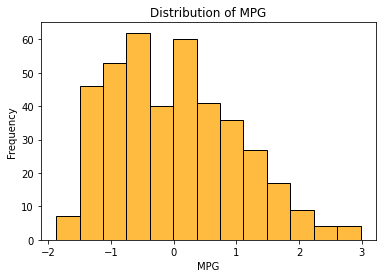

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the histogram for MPG
sns.histplot(preprocessedData['mpg'],color='orange')
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

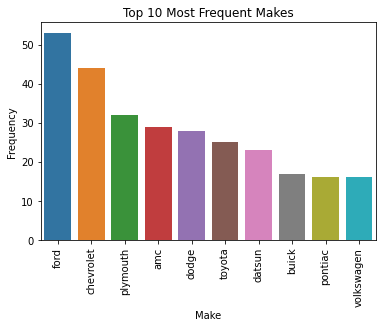

In [24]:
make_counts = preprocessedData['make'].value_counts()
top_10 = make_counts.head(10)
# Create the bar plot
sns.barplot(x=top_10.index, y=top_10.values)
plt.title('Top 10 Most Frequent Makes')
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.xticks(rotation=90) 
plt.show()


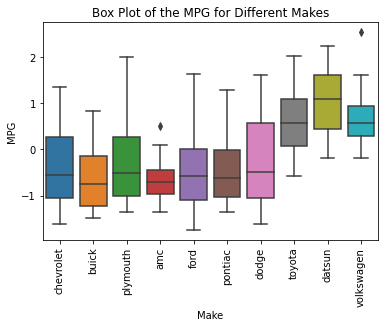

In [25]:
top_10_makes = make_counts.head(10).index
# Filter the dataset for these top 10 makes
top_10_makes_data = preprocessedData[preprocessedData['make'].isin(top_10_makes)]
# Create the box plot
sns.boxplot(x='make', y='mpg', data=top_10_makes_data)
plt.title('Box Plot of the MPG for Different Makes')
plt.xlabel('Make')
plt.ylabel('MPG')
plt.xticks(rotation=90)
plt.show()


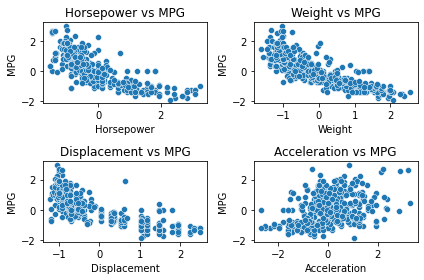

In [26]:
# Scatter plot for horsepower vs MPG
plt.subplot(2, 2, 1)  # (rows, columns, position)
sns.scatterplot(x='horsepower', y='mpg', data=preprocessedData)
plt.title('Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Scatter plot for weight vs MPG
plt.subplot(2, 2, 2)
sns.scatterplot(x='weight', y='mpg', data=preprocessedData)
plt.title('Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')

# Scatter plot for displacement vs MPG
plt.subplot(2, 2, 3)
sns.scatterplot(x='displacement', y='mpg', data=preprocessedData)
plt.title('Displacement vs MPG')
plt.xlabel('Displacement')
plt.ylabel('MPG')

# Scatter plot for acceleration vs MPG
plt.subplot(2, 2, 4)
sns.scatterplot(x='acceleration', y='mpg', data=preprocessedData)
plt.title('Acceleration vs MPG')
plt.xlabel('Acceleration')
plt.ylabel('MPG')


# Show the plots
plt.tight_layout()
plt.show()


In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (70% training, 15% validation, 15% testing)
trainingdata, temp = train_test_split(preprocessedData, test_size=0.30, random_state=42)
validationdata, testingdata = train_test_split(temp, test_size=0.50, random_state=42)
print("Training set size:",len(trainingdata))
print("Validation set size:",len(validationdata))
print("Test set size:",len(testingdata))

Training set size: 284
Validation set size: 61
Test set size: 61


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train= trainingdata.drop(['mpg', 'car_name','make'], axis=1)  
Y_train = trainingdata['mpg'] 
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [30]:
X_valid= validationdata.drop(['mpg', 'car_name','make'], axis=1) 
Y_valid= validationdata['mpg']
y_predict_valid = model.predict(X_valid)
mean_sq_err_valid = mean_squared_error(Y_valid, y_predict_valid)
r_square_valid = r2_score(Y_valid, y_predict_valid)
print("Mean Squared Error of validation data is : ",mean_sq_err_valid)
print("R-squared value of validation data is: ",r_square_valid)

Mean Squared Error of validation data is :  0.24014895795304173
R-squared value of validation data is:  0.799069631883105


In [31]:
X_test= testingdata.drop(['mpg', 'car_name','make'], axis=1) 
Y_test= testingdata['mpg']
y_predict_test = model.predict(X_test)
mean_sq_err_test = mean_squared_error(Y_test, y_predict_test)
r_square_test = r2_score(Y_test, y_predict_test)
print("Mean Squared Error of testing data is : ",mean_sq_err_test)
print("R-squared value of testing data is: ",r_square_test)

Mean Squared Error of testing data is :  0.26673260736998733
R-squared value of testing data is:  0.7505093281048625


In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_valid_scale=scaler.transform(X_valid)
X_test_scale=scaler.transform(X_test)

In [34]:
ridge= Ridge()
#hyperparameter
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}
#GridSearchCV to find the best alpha
gridsearch = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
gridsearch.fit(X_train_scale, Y_train)
best_alpha = gridsearch.best_params_['alpha']
print("Best alpha from GridSearchCV is : ",best_alpha)

Best alpha from GridSearchCV is :  1


In [35]:
#Training model with best alpha
best_alpha_model = gridsearch.best_estimator_
print(best_alpha_model)

Ridge(alpha=1)


In [36]:
#Validation data prediction
y_predict_valid_2 = best_alpha_model.predict(X_valid_scale)
mean_sq_err_valid_2 = mean_squared_error(Y_valid, y_predict_valid_2)
r_square_valid_2 = r2_score(Y_valid, y_predict_valid_2)
print("Mean Squared Error of validation data is : ",mean_sq_err_valid_2)
print("R-squared value of validation data is: ",r_square_valid_2)

Mean Squared Error of validation data is :  0.2398511506689444
R-squared value of validation data is:  0.7993188044288932


In [39]:
# Testing data prediction
y_predict_test_2 = best_alpha_model.predict(X_test_scale)
mean_sq_err_test_2 = mean_squared_error(Y_test, y_predict_test_2)
r_square_test_2 = r2_score(Y_test, y_predict_test_2)
print("Mean Squared Error of testing data is : ",mean_sq_err_test_2)
print("R-squared value of testing data is: ",r_square_test_2)

Mean Squared Error of testing data is :  0.26621921824832945
R-squared value of testing data is:  0.7509895310997983


In [40]:
coefs = best_alpha_model.coef_
intercept = best_alpha_model.intercept_
equation = f"MPG = {intercept:.4f} "  # Start with intercept
for i, coef in enumerate(coefs):
    equation += f" + ({coef:.4f} * X{i + 1})"  # Add each feature term
    
print("Model Equation:")
print(equation)

Model Equation:
MPG = 0.0479  + (-0.1143 * X1) + (0.2527 * X2) + (-0.1067 * X3) + (-0.6818 * X4) + (-0.0572 * X5) + (0.1524 * X6) + (0.1424 * X7) + (-0.1524 * X8) + (0.0337 * X9)


In [41]:
#Predict MPG function
def predictMPG(model, scaler, input_data):
    input_data_scaled = scaler.transform([input_data])
    predicted_mpg = model.predict(input_data_scaled)
    return predicted_mpg[0]